In [1]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/leer_procesar_modelos_NARMAX/results/

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/leer_procesar_modelos_NARMAX/results


In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model

summaryModelsGRU1S = pd.read_excel('grilla_GRU_NARMAX_1STEPS.xlsx', header=0)
summaryModelsGRU2S = pd.read_excel('grilla_GRU_NARMAX_2STEPS.xlsx', header=0)
summaryModelsGRU3S = pd.read_excel('grilla_GRU_NARMAX_3STEPS.xlsx', header=0)

grilla_GRU_NARMAX_AQP = pd.concat([summaryModelsGRU1S, summaryModelsGRU2S], ignore_index=True)
grilla_GRU_NARMAX_AQP = pd.concat([grilla_GRU_NARMAX_AQP, summaryModelsGRU3S], ignore_index=True)

grilla_GRU_NARMAX_AQP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAPE                    288 non-null    float64
 1   delayedSteps            288 non-null    int64  
 2   nameModel               288 non-null    object 
 3   nameHistory             288 non-null    object 
 4   nameConfiguration       288 non-null    object 
 5   timeTrain (in seconds)  288 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 13.6+ KB


##La cantidad de modelos generados para el GRU NARX de DDFO fue de 288

In [4]:
rslt_df = grilla_GRU_NARMAX_AQP.sort_values('MAPE')
total = grilla_GRU_NARMAX_AQP['timeTrain (in seconds)'].sum()
print("Tiempo total: " + str(total))
grilla_GRU_NARMAX_AQP.describe()

Tiempo total: 32538.85


MAPE  delayedSteps  timeTrain (in seconds)
count  288.000000    288.000000              288.000000
mean    79.060558      2.000000              112.982118
std     33.454766      0.817918               16.802655
min     10.988469      1.000000               50.750000
25%     44.521561      1.000000              102.365000
50%     99.621882      2.000000              107.050000
75%     99.631590      3.000000              118.030000
max    100.000000      3.000000              158.510000

##La cantidad de segundos totales para ejecutar la grilla es aproximadamente 32538, lo que equivale a 9 horas aproximadamente. Además se tienen las estadisticas resumen.

In [5]:
rslt_df.iloc[:45,:]

MAPE  ...  timeTrain (in seconds)
126  10.988469  ...                  103.55
156  12.352019  ...                  112.80
127  14.008310  ...                  102.39
144  14.762479  ...                  113.70
174  14.838661  ...                  135.71
151  15.192654  ...                  112.52
169  15.399922  ...                  139.18
145  15.571086  ...                  113.45
138  15.784236  ...                  104.47
139  15.910597  ...                  103.44
240  16.054853  ...                  119.05
157  16.510605  ...                  111.23
234  16.964973  ...                  108.57
163  17.888528  ...                  110.94
115  18.196284  ...                  103.31
121  18.209200  ...                  107.33
133  18.525565  ...                  106.48
25   18.593248  ...                  102.55
7    18.739736  ...                  101.99
19   19.057689  ...                  100.04
102  19.126217  ...                  101.49
37   19.187952  ...                   99.49
168  19.498175  ...                  137.49
181  19.972241  ...                  134.99
277  20.362295  ...                  153.33
6    20.455891  ...                   98.77
120  20.496508  ...                  107.28
24   20.542061  ...                  101.99
132  21.058860  ...                  103.78
217  21.307222  ...                  109.62
265  21.356440  ...                  154.20
60   21.476423  ...                  104.06
18   21.712315  ...                   97.61
103  21.866493  ...                  100.92
216  22.051250  ...                  113.20
36   22.111116  ...                   99.16
43   22.167505  ...                  100.45
42   22.216935  ...                   98.92
61   22.280040  ...                  102.01
211  22.595880  ...                  103.76
282  22.922161  ...                  151.42
150  23.050212  ...                  110.78
48   23.247241  ...                  106.31
241  23.259456  ...                  120.54
85   23.417858  ...                  116.50

[45 rows x 6 columns]

In [6]:
rslt_df.iloc[0,:]

MAPE                                                                10.9885
delayedSteps                                                              2
nameModel                 results/GRU_214_1_64_tanh_tanh_relu_mean_squar...
nameHistory               results/GRU_214_1_64_tanh_tanh_relu_mean_squar...
nameConfiguration         results/GRU_214_1_64_tanh_tanh_relu_mean_squar...
timeTrain (in seconds)                                               103.55
Name: 126, dtype: object

In [7]:
bestModel = rslt_df.iloc[0,:]
print(bestModel)

MAPE                                                                10.9885
delayedSteps                                                              2
nameModel                 results/GRU_214_1_64_tanh_tanh_relu_mean_squar...
nameHistory               results/GRU_214_1_64_tanh_tanh_relu_mean_squar...
nameConfiguration         results/GRU_214_1_64_tanh_tanh_relu_mean_squar...
timeTrain (in seconds)                                               103.55
Name: 126, dtype: object


In [8]:
print(bestModel['nameHistory'])
print(bestModel['nameConfiguration'])
print(bestModel['nameModel'])

results/GRU_214_1_64_tanh_tanh_relu_mean_squared_error_2S_history.npy
results/GRU_214_1_64_tanh_tanh_relu_mean_squared_error_2S_config.npy
results/GRU_214_1_64_tanh_tanh_relu_mean_squared_error_2S.h5


In [9]:
print(bestModel['nameHistory'].split("/")[1])
print(bestModel['nameConfiguration'].split("/")[1])
print(bestModel['nameModel'].split("/")[1])

GRU_214_1_64_tanh_tanh_relu_mean_squared_error_2S_history.npy
GRU_214_1_64_tanh_tanh_relu_mean_squared_error_2S_config.npy
GRU_214_1_64_tanh_tanh_relu_mean_squared_error_2S.h5


In [10]:
#para recuperar history
history=np.load(bestModel['nameHistory'].split("/")[1],allow_pickle='TRUE').item()
print(history)

#para recuperar configDict
config=np.load(bestModel['nameConfiguration'].split("/")[1],allow_pickle='TRUE').item()
print(config)

# para recuperar el modelo
saved_model = load_model(bestModel['nameModel'].split("/")[1])
print(saved_model.summary())
print(saved_model.layers[2].get_config())

{'loss': [101677.5703125, 101604.34375, 101540.09375, 101470.5859375, 101407.84375, 101333.4375, 101251.3046875, 101179.1484375, 101081.4296875, 100992.109375, 100879.59375, 100764.4375, 100632.9375, 100488.078125, 100322.9453125, 100140.296875, 99933.4453125, 99713.3671875, 99461.4609375, 99186.5390625, 98883.0390625, 98549.34375, 98196.5234375, 97766.7890625, 97375.234375, 96894.953125, 96417.9453125, 95907.9609375, 95386.7109375, 94841.6796875, 94298.3828125, 93721.3203125, 93196.78125, 92631.7421875, 92084.90625, 91576.4296875, 91090.609375, 90583.546875, 90111.1796875, 89652.5859375, 89187.671875, 88772.9921875, 88322.3671875, 87896.3671875, 87491.75, 87075.578125, 86673.328125, 86283.6875, 85890.890625, 85517.7109375, 85125.34375, 84773.484375, 84407.734375, 84051.4609375, 83692.4375, 83351.125, 83005.5234375, 82665.3046875, 82332.03125, 81998.7109375, 81663.0, 81335.2578125, 81012.1796875, 80695.1640625, 80371.1796875, 80050.2109375, 79735.5703125, 79428.921875, 79116.234375, 78

In [11]:
def cargarData1():
  trainDFScaled = pd.read_csv('data/dataTrainNarmaxScaledGRU.csv', header=0)
  testDFScaled = pd.read_csv('data/dataTestNarmaxScaledGRU.csv', header=0)
  trainDF = pd.read_csv('data/dataTrainNarmaxGRU.csv', header=0)
  testDF = pd.read_csv('data/dataTestNarmaxGRU.csv', header=0)
  return trainDFScaled, testDFScaled, trainDF, testDF


# calculate the error between an actual and predicted value
def mae(actual, predicted):
	# calculate abs difference
	return abs(actual - predicted)
 
def mape(actual,pred):
  return np.mean(np.abs((actual - pred) / actual)) * 100

def evaluate_forecasts(predictions, testData):
  total_mae = 0.0
  total_mape = 0.0
  total_c = 0
  for i in range(len(predictions)):
    real = testData[i]
    predicted = predictions[i]
    # calculate error
    error_mae = mae(real, predicted)
    error_mape = mape(real, predicted)
    # update statistics
    total_mae += error_mae
    total_mape += error_mape
    total_c += 1
  # normalize summed absolute errors
  total_mae /= total_c
  total_mape /= total_c
  return total_mae, total_mape


def generateSupervisedData(data, delays, predictionHorizon, columnTarget = 12):
  X = list()
  y = list()
  cantidadFilas = data.shape[0]
  indexAux = 0
  indexTarget = 0
  for _, row in data.iterrows():
    end_row = indexAux + delays
    indexTarget = end_row - 1 + predictionHorizon
    if indexTarget <= cantidadFilas-1:
      salidaAux = data.iloc[indexTarget, columnTarget]
      xAux = data.iloc[indexAux:end_row, :].values
      #print(xAux.shape)
      #print(xAux)
      X.append(xAux)
      y.append(salidaAux)
      #print(salidaAux)
    indexAux = indexAux + 1
  X = np.array(X)
  y = np.array(y)
  return X, y

def generateFinalData(delays, predictionHorizon, trainDFScaled, testDFScaled, trainDF, testDF):
  trainXScaled, trainYScaled = generateSupervisedData(trainDFScaled, delays, predictionHorizon)
  testXScaled, testYScaled = generateSupervisedData(testDFScaled, delays, predictionHorizon)
  trainX, trainY = generateSupervisedData(trainDF, delays, predictionHorizon)
  testX, testY = generateSupervisedData(testDF, delays, predictionHorizon)
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  #print("trainYScaled.shape: ", str(trainYScaled.shape))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  #print("testYScaled.shape: ", str(testYScaled.shape))
  #print("trainX.shape: ", str(trainX.shape))
  #print("trainY.shape: ", str(trainY.shape))
  #print("testX.shape: ", str(testX.shape))
  #print("testY.shape: ", str(testY.shape))
  return trainXScaled, trainY, testXScaled, testY


def plotErrors(historyModel):
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
  fig.suptitle('Errors')
  ax1.plot(historyModel['mean_squared_error'], label='mse')
  ax1.plot(historyModel['val_mean_squared_error'], label='val_mse')
  ax1.legend()

  ax2.plot(historyModel['root_mean_squared_error'], label='rmse')
  ax2.plot(historyModel['val_root_mean_squared_error'], label='val_rmse')
  ax2.legend()

  ax3.plot(historyModel['mean_absolute_error'], label='mae')
  ax3.plot(historyModel['val_mean_absolute_error'], label='val_mae')
  ax3.legend()

  ax4.plot(historyModel['mean_absolute_percentage_error'], label='mape')
  ax4.plot(historyModel['val_mean_absolute_percentage_error'], label='val_mape')
  ax4.legend()

def plotLoss(historyModel):
  fig, ax = plt.subplots(1, 1)
  ax.plot(historyModel['loss'], label='loss')
  ax.plot(historyModel['val_loss'], label='val_loss')
  ax.legend()


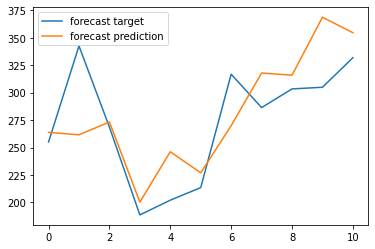

In [12]:
trainDFScaled, testDFScaled, trainDF, testDF = cargarData1()
trainXScaled, trainY, testXScaled, testY = generateFinalData(bestModel['delayedSteps'], 1, trainDFScaled, testDFScaled, trainDF, testDF)
#trainXScaled, testXScaled = reshapeXdata(trainXScaled, testXScaled)
validation_target = testY[:]
validation_predictions = saved_model.predict(testXScaled[:,:])
fig, ax = plt.subplots(1, 1)
ax.plot(validation_target, label='forecast target')
ax.plot(validation_predictions, label='forecast prediction')
ax.legend()

plotLoss(history)
plotErrors(history)